# Project: Clustering (k-Means)
## Name: Melody Goldanloo

In [52]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# The Dataset
- The Iris dataset contains 150 samples with four features each: sepal length, sepal width, petal length, and petal width.
- The dataset is labeled with three classes: Iris-setosa, Iris-versicolor, and Iris-virginica.

In [20]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Data Preprocessing

In [21]:
# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

print('Shape of Data (X):',iris.data.shape)
print('Shape of Target Data (y)', iris.target.shape)

Shape of Data (X): (150, 4)
Shape of Target Data (y) (150,)


# Building the k-Means Model
**Model Initialization**:
- Choosing K: Decide on the number of clusters (K). For the Iris dataset, K=3 is typically used because there are three known classes. Try it out with a few different values for k, do some score better than others?
- K-Means Initialization: Use the K-Means algorithm from Scikit-learn, specifying the number of clusters and other parameters such as the random state for reproducibility.

**Model Fitting**: Fit the K-Means model to the standardized Iris dataset. This process involves the iterative steps of the K-Means algorithm (assignment and update steps) until convergence.

In [51]:
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores.append(kmeans_silhouette)

    inertia = kmeans.inertia_ 
    inertia_values.append(inertia)
    
    print(f"K={k}, Silhouette Score: {kmeans_silhouette:.2f}, Inertia: {inertia:.2f}")


K=2, Silhouette Score: 0.58, Inertia: 222.36
K=3, Silhouette Score: 0.48, Inertia: 191.02
K=4, Silhouette Score: 0.39, Inertia: 114.35
K=5, Silhouette Score: 0.35, Inertia: 91.05
K=6, Silhouette Score: 0.33, Inertia: 81.55


In [43]:
# Initialize the k-Means model object
kmeans = KMeans(n_clusters=2, random_state=42)
# n_clusters = 2 resulted in a higher silhoutte score than k = 3 or 4.
kmeans_labels = kmeans.fit_predict(X_scaled)

# also, I noticed the model trained on the "unscaled" X had a higher silhoette score than that with the X-scaled training data.


# Evaluating the Model

In [47]:
print(kmeans_labels)

# calculate silhouette score for K-means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    # evaluates the quality of the custers
    # how similar a data point is to its own cluster compared to other clusters

inertia = kmeans.inertia_  
    # measures how tightly the clusters are packed (smaller = tighter)

print("Silhouette Score:", kmeans_silhouette)
print("Intertia:", inertia)

[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 2 4 0 4 3 0 0 0 3 0 3 3 0 3 0 0 0 0 3 3 3 0 0 0 0
 0 0 0 4 0 3 3 3 3 0 0 0 0 3 0 3 3 0 3 3 3 0 0 0 3 0 4 0 4 0 4 4 3 4 0 4 4
 0 4 0 0 4 4 4 4 3 4 0 4 0 4 4 0 0 0 4 4 4 4 0 0 4 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]
Silhouette Score: 0.34503345350274617
Intertia: 91.04766991109528


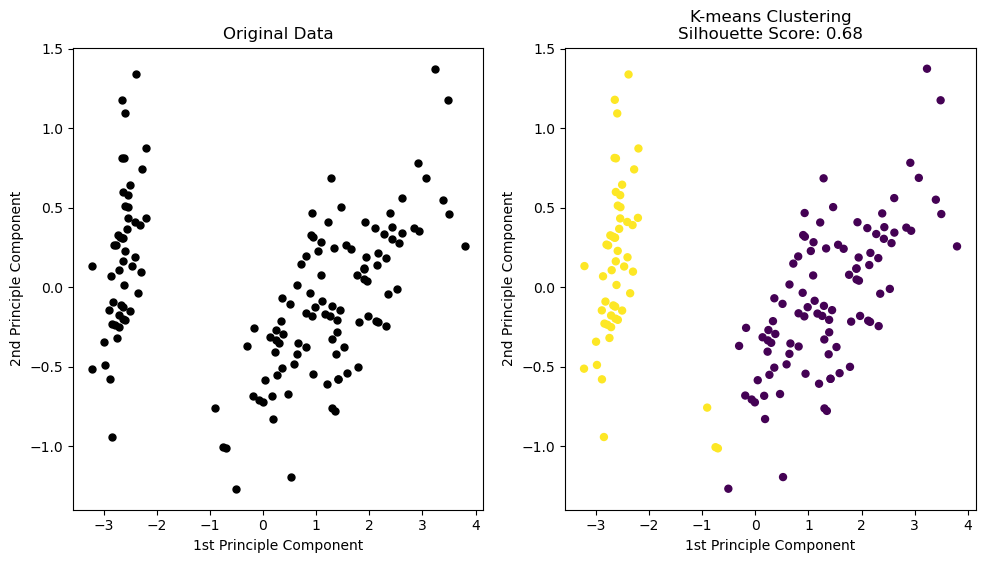

In [48]:
# I wanted to visualize it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

#Only since we have labels, gives us an idea of how the clustering results
kmeans_silhouette = silhouette_score(X, kmeans_labels)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='k', s=25)
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=25)
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.title("Original Data")

#Plot the K-means clustering results
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=25)
plt.title("K-means Clustering")
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.title(f"K-means Clustering\nSilhouette Score: {kmeans_silhouette:.2f}")

plt.show()

## For the Model Selection Project, you will STOP HERE! 
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Evaluating the Tuned Model (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Visualizing Results (Completed in Units 4 and 6)

In [ ]:
#Insert Code Here